In [37]:
import pandas as pd
import numpy as np

df = pd.read_csv('temp_df_final.csv', index_col = 0).iloc[:, 1:]

df2 = pd.read_csv('섹터ETF취합/Add_TI_섹터ETF/TIGER200_IT_TI.csv', index_col = 0)

df2

,날짜,종가,diff_5,diff_20,ma_5,ma_20
1119,2019-09-05,6325.0,0.030970,-0.007064,6289.0,6226.00
1118,2019-09-06,6360.0,0.012739,-0.002353,6305.0,6225.25
1117,2019-09-09,6410.0,0.019078,0.005490,6329.0,6227.00
1116,2019-09-10,6550.0,0.050521,0.044657,6392.0,6241.00
1115,2019-09-11,6625.0,0.049089,0.071140,6454.0,6263.00
...,...,...,...,...,...,...
4,2024-03-15,8370.0,0.033972,0.124244,8256.0,7931.25
3,2024-03-18,8265.0,0.029265,0.074772,8303.0,7960.00
2,2024-03-19,8120.0,0.008696,0.029803,8317.0,7971.75
1,2024-03-20,8200.0,-0.006663,0.067014,8306.0,7997.50


### 날짜 형식 통일

In [38]:
# Converting 'stateDt' to datetime format
df['stateDt'] = pd.to_datetime(df['stateDt'], format='%Y%m%d')


# Renaming the 'stateDt' column to 'Date'
df.rename(columns={'stateDt': 'Date'}, inplace=True)


df.tail()  # Display the last few rows to check the changes


,Date,decideCnt,deathCnt
1106,2023-04-15,30978954.0,34368.0
1107,2023-04-17,30994088.0,34376.0
1108,2023-04-18,31009261.0,34386.0
1109,2023-04-19,31025769.0,34392.0
1110,2023-04-20,31039863.0,34401.0


In [39]:
# '날짜'와 '종가' 컬럼 이름 변경
df2.rename(columns={'날짜': 'Date', '종가': 'Close'}, inplace=True)
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m-%d')
df2['diff_1'] = df2['Close'].pct_change()

df2.head()  # 변경된 데이터프레임의 마지막 몇 행을 확인합니다.


,Date,Close,diff_5,diff_20,ma_5,ma_20,diff_1
1119,2019-09-05,6325.0,0.030970,-0.007064,6289.0,6226.00,NaN
1118,2019-09-06,6360.0,0.012739,-0.002353,6305.0,6225.25,0.005534
1117,2019-09-09,6410.0,0.019078,0.005490,6329.0,6227.00,0.007862
1116,2019-09-10,6550.0,0.050521,0.044657,6392.0,6241.00,0.021841
1115,2019-09-11,6625.0,0.049089,0.071140,6454.0,6263.00,0.011450


### 외생변수 데이터 5일 차분으로 변환

In [40]:
# df에서 decideCnt와 deathCnt의 차이를 계산하고, 이를 %로 변환
df['decideCnt_diff'] = df['decideCnt'].diff().fillna(0)
df['deathCnt_diff'] = df['deathCnt'].diff().fillna(0)
df['decideCnt_diff_perc'] = df['decideCnt_diff'] / df['decideCnt'].shift(5)
df['deathCnt_diff_perc'] = df['deathCnt_diff'] / df['deathCnt'].shift(5)
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # 무한대 값을 NaN으로 대체

# df2와 df를 'Date' 기준으로 합치기
df_combined = pd.merge(df2, df[['Date', 'decideCnt_diff_perc', 'deathCnt_diff_perc']], on='Date', how='outer')

# NaN이 포함된 행 제거
df_combined.dropna(inplace=True)

df_combined.tail()

,Date,Close,diff_5,diff_20,ma_5,ma_20,diff_1,decideCnt_diff_perc,deathCnt_diff_perc
891,2023-04-14,6260.0,0.031301,0.020375,6122.0,6106.75,0.024550,0.000377,0.000146
892,2023-04-17,6240.0,0.033113,0.021277,6162.0,6113.25,-0.003195,0.000489,0.000233
893,2023-04-18,6245.0,0.025452,0.016273,6193.0,6118.25,0.000801,0.000490,0.000291
894,2023-04-19,6320.0,0.034370,0.022654,6235.0,6125.25,0.012010,0.000533,0.000175
895,2023-04-20,6355.0,0.040098,0.030819,6284.0,6134.75,0.005538,0.000455,0.000262


In [41]:
df_combined

,Date,Close,diff_5,diff_20,ma_5,ma_20,diff_1,decideCnt_diff_perc,deathCnt_diff_perc
116,2020-02-27,5885.0,-0.046964,-0.085470,5917.0,6240.25,0.004266,1.166282,0.500000
117,2020-02-28,5755.0,-0.055008,-0.098669,5850.0,6208.75,-0.022090,0.948505,0.000000
118,2020-03-02,5685.0,-0.028205,-0.106132,5817.0,6175.00,-0.012163,0.377478,0.333333
119,2020-03-03,5650.0,-0.042373,-0.108129,5767.0,6140.75,-0.006157,0.339751,0.461538
120,2020-03-04,5730.0,-0.022184,-0.104688,5741.0,6107.25,0.014159,0.220796,0.307692
...,...,...,...,...,...,...,...,...,...
891,2023-04-14,6260.0,0.031301,0.020375,6122.0,6106.75,0.024550,0.000377,0.000146
892,2023-04-17,6240.0,0.033113,0.021277,6162.0,6113.25,-0.003195,0.000489,0.000233
893,2023-04-18,6245.0,0.025452,0.016273,6193.0,6118.25,0.000801,0.000490,0.000291
894,2023-04-19,6320.0,0.034370,0.022654,6235.0,6125.25,0.012010,0.000533,0.000175


### optimal lag를 찾는 함수 작성

In [42]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt
from tqdm import tqdm 

# 예제 데이터 (Assuming df_combined is already defined)
# df_combined = pd.DataFrame({...}) 

windows = [len(df_combined)]
max_lags = {len(df_combined): 120}

def optimal_lag(df_combined, window, max_lag):
    p_values_dict = {}  # 각 윈도우의 p-value를 저장할 딕셔너리

    # tqdm is used here to show progress
    for start in tqdm(range(len(df_combined) - window + 1), desc=f'Processing Window {window}'):
        sub_df_combined = df_combined.iloc[start:start + window]
        best_p_value = float('inf')
        best_lag = 0
        p_values = []  # 각 윈도우에 대한 p-value 리스트
        
        for lag in range(1, max_lag + 1):
            result = grangercausalitytests(sub_df_combined[['diff_5', 'deathCnt_diff_perc']], maxlag=lag, verbose=False)
            p_value = result[lag][0]['ssr_ftest'][1]
            p_values.append(p_value)  # p-value 저장

            print(f"Lag {lag}: p-value = {p_value:.6f}")
            
            if p_value < best_p_value:
                best_p_value = p_value
                best_lag = lag
        
        # if best_p_value > 0.05:
        #     best_lag = 0
        
        p_values_dict[start] = p_values  # 해당 윈도우의 p-value 리스트 저장

        print(f"Best lag for this window: {best_lag} with p-value = {best_p_value:.6f}\n")
    
    return p_values_dict



### 출력 및 결과 시각화

Processing Window 753:   0%|          | 0/1 [00:00<?, ?it/s]

Lag 1: p-value = 0.071565
Lag 2: p-value = 0.171859
Lag 3: p-value = 0.204411
Lag 4: p-value = 0.079812
Lag 5: p-value = 0.027292
Lag 6: p-value = 0.103277
Lag 7: p-value = 0.002921
Lag 8: p-value = 0.000198
Lag 9: p-value = 0.003487
Lag 10: p-value = 0.054495
Lag 11: p-value = 0.062148
Lag 12: p-value = 0.065369
Lag 13: p-value = 0.091798
Lag 14: p-value = 0.106845
Lag 15: p-value = 0.276917
Lag 16: p-value = 0.211930
Lag 17: p-value = 0.191936
Lag 18: p-value = 0.282653
Lag 19: p-value = 0.540314
Lag 20: p-value = 0.587521
Lag 21: p-value = 0.370671
Lag 22: p-value = 0.571900
Lag 23: p-value = 0.701162
Lag 24: p-value = 0.728182
Lag 25: p-value = 0.687756
Lag 26: p-value = 0.712400
Lag 27: p-value = 0.737542
Lag 28: p-value = 0.739886
Lag 29: p-value = 0.767834
Lag 30: p-value = 0.642212
Lag 31: p-value = 0.700354
Lag 32: p-value = 0.826615
Lag 33: p-value = 0.896654
Lag 34: p-value = 0.889043
Lag 35: p-value = 0.900779
Lag 36: p-value = 0.913149
Lag 37: p-value = 0.926979
Lag 38: p-

Processing Window 753: 100%|██████████| 1/1 [00:56<00:00, 56.59s/it]

Lag 120: p-value = 0.792599
Best lag for this window: 8 with p-value = 0.000198



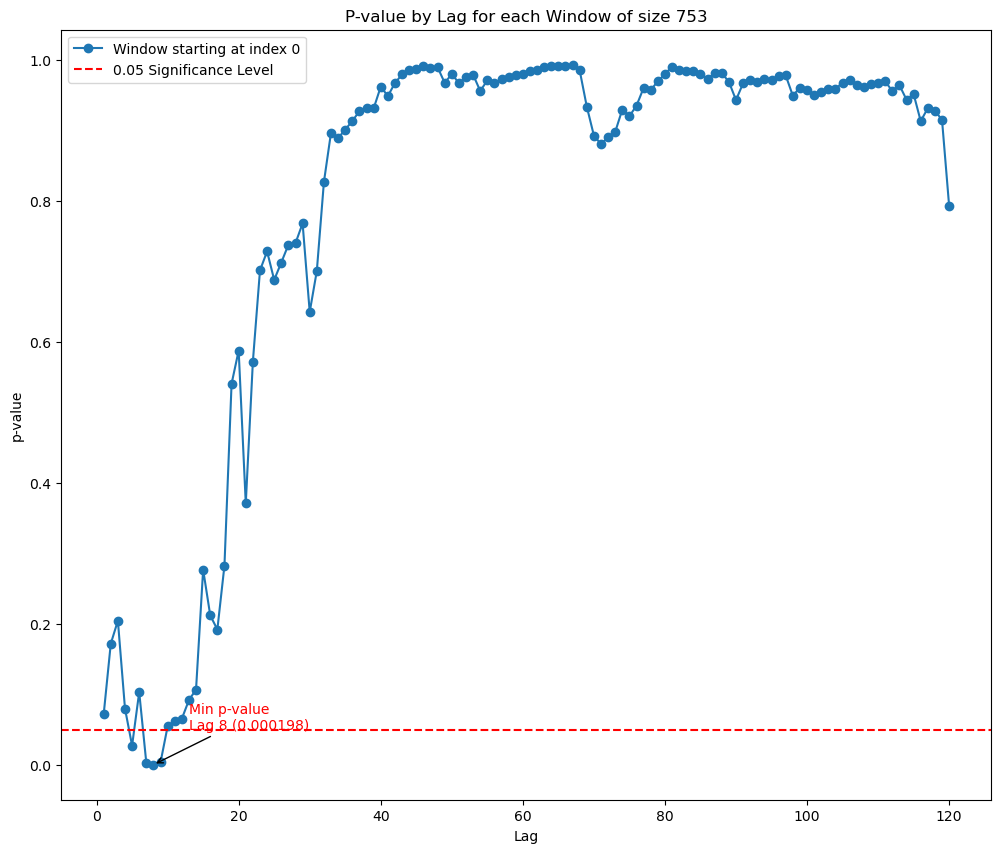

In [43]:
# Loop over the windows and compute the p-values for each
for window in windows:
    max_lag = max_lags[window]
    p_values_dict = optimal_lag(df_combined, window, max_lag)

    # 시각화
    plt.figure(figsize=(12, 10))
    
    for start, p_values in p_values_dict.items():
        plt.plot(range(1, max_lag + 1), p_values, marker='o', label=f'Window starting at index {start}')
        
        # p-value가 최소가 되는 지점 찾기
        min_p_value = min(p_values)
        min_lag = p_values.index(min_p_value) + 1
        
        # 그래프에 표시
        plt.annotate(f'Min p-value\nLag {min_lag} ({min_p_value:.6f})',
                     xy=(min_lag, min_p_value), xytext=(min_lag + 5, min_p_value + 0.05),
                     arrowprops=dict(facecolor='black', arrowstyle='->'),
                     fontsize=10, color='red')

    plt.xlabel('Lag')
    plt.ylabel('p-value')
    plt.title(f'P-value by Lag for each Window of size {window}')
    plt.axhline(y=0.05, color='r', linestyle='--', label='0.05 Significance Level')
    plt.legend(loc='best')
    plt.show()
